<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 9th exercise: <font color="#C70039">Interpretable Machine Learning by means of Partial Dependence (PDP) and Individual Conditional Expectation (ICE) Plots</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   04.08.2025

* **Student: Tzu-Lun Yeh**
* **Matriculation Number: 11496498**
* **Date: 19.11.2025**

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_003.png" style="float: center;" width="800">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

---------------------------------

### <font color="ce33ff">DESCRIPTION</font>:

Partial dependence plots (PDP) and individual conditional expectation (ICE) plots can be used to visualize and analyze the interaction between the target response and a set of input features of interest.
Both PDPs [H2009] and ICEs [G2015] assume that the input features of interest are independent from the complement features and this assumption is often violated in practice. Thus, in the case of correlated features, we will create absurd data points to compute the PDP/ICE.

[H2009]
T. Hastie, R. Tibshirani and J. Friedman, The Elements of Statistical Learning, Second Edition, Section 10.13.2, Springer, 2009.

[G2015]
A. Goldstein, A. Kapelner, J. Bleich, and E. Pitkin, “Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation” Journal of Computational and Graphical Statistics, 24(1): 44-65, Springer, 2015.

---------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * try to follow the interpretations by printing out the decision tree and look for the feature patterns that the PDPs indicate.

**PART I**<br>
4. download an interesting data set from Kaggle and do the preprocessing.<br>
5. change the classifier according to the data set. The more blackbox the better.<br>
6. use PDP to identify the most relevant features explaining the target response of the data set.<br>
7. comment your entire code and your findings.<br>  

**PART II**<br>
8. use the data set and the classifer from steps 4 and 5<br>
9. plot ICE curves with parameter (kind='both')<br>
10. comment your entire code and your findings.<br>  

---------------------------------

# <font color="ce33ff">PART I (Partial Dependence Plots)</font>

## Imports
Import all necessary python utilities.

In [1]:
# Import necessary libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

print("Libraries imported successfully!")

/Users/tly/Documents/GitHub/AML/AML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Libraries imported successfully!


## Load data set

In [2]:
# Load Credit Card Customers dataset from Kaggle
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "sakshigoyal7/credit-card-customers",
    "BankChurners.csv"  # Specify the CSV file name
)

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 records:")
df.head()

/var/folders/11/v8ntzdyn4_9bszphhpzgp6540000gn/T/ipykernel_12806/80328247.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Dataset shape: (10127, 23)

First 5 records:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Check dataset information
print("Column names:")
print(df.columns.tolist())
print("\n" + "="*60)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*60)
print("\nData types:")
print(df.dtypes)

Column names:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


Missing values:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age  

## Preprocessing


In [4]:
# Simple Preprocessing: Fill missing values + Encode categorical variables

# Create a copy
df_clean = df.copy()

# IMPORTANT: Drop Naive Bayes classifier columns (data leakage)
# These are pre-computed predictions that would make our analysis meaningless
nb_cols = [col for col in df_clean.columns if 'Naive_Bayes_Classifier' in col]
if nb_cols:
    df_clean = df_clean.drop(nb_cols, axis=1)
    print(f"Dropped {len(nb_cols)} Naive Bayes columns (data leakage prevention)")

# Step 1: Fill missing values
# For categorical: mode (most frequent value)
# For numerical: median
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print(f"Missing values filled. Remaining: {df_clean.isnull().sum().sum()}")

# Step 2: Identify and encode target variable
# Common target: 'Attrition_Flag' (Existing Customer / Attrited Customer)
target_col = 'Attrition_Flag' if 'Attrition_Flag' in df_clean.columns else None

if target_col:
    print(f"\nTarget variable: {target_col}")
    print(df_clean[target_col].value_counts())
    # Encode: Attrited Customer = 1, Existing Customer = 0
    df_clean[target_col] = (df_clean[target_col] == 'Attrited Customer').astype(int)
    print("Target encoded: Attrited Customer=1, Existing Customer=0")

# Step 3: Drop ID columns
id_cols = ['CLIENTNUM']
for id_col in id_cols:
    if id_col in df_clean.columns:
        df_clean = df_clean.drop(id_col, axis=1)
        print(f"Dropped ID column: {id_col}")

# Step 4: One-hot encode remaining categorical variables
cat_to_encode = [col for col in df_clean.select_dtypes(include='object').columns if col != target_col]
if len(cat_to_encode) > 0:
    df_clean = pd.get_dummies(df_clean, columns=cat_to_encode, drop_first=False)
    print(f"One-hot encoded {len(cat_to_encode)} categorical columns")

# Step 5: Prepare X and y
if target_col:
    y = df_clean[target_col]
    X = df_clean.drop(target_col, axis=1)
else:
    y = df_clean.iloc[:, -1]
    X = df_clean.iloc[:, :-1]

print(f"\nFinal dataset (using REAL customer features only):")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

Dropped 2 Naive Bayes columns (data leakage prevention)
Missing values filled. Remaining: 0

Target variable: Attrition_Flag
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Target encoded: Attrited Customer=1, Existing Customer=0
Dropped ID column: CLIENTNUM
One-hot encoded 5 categorical columns

Final dataset (using REAL customer features only):
X shape: (10127, 37)
y shape: (10127,)
Target distribution: {0: 8500, 1: 1627}


## Train the classifier

Start with a simple decision tree model.
<font color=red>Note:</font> The calculation of a partial dependence can happen obviously, only after a model has been trained.

In [5]:
# Train XGBoost Classifier (Blackbox Model)

# Split data into train and validation sets
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {train_x.shape[0]} samples")
print(f"Validation set: {val_x.shape[0]} samples")

# Train XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(train_x, train_y)

# Evaluate model
train_pred = xgb_model.predict(train_x)
val_pred = xgb_model.predict(val_x)

print(f"\nModel trained successfully!")
print(f"Training Accuracy: {accuracy_score(train_y, train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(val_y, val_pred):.4f}")

print("\nClassification Report:")
print(classification_report(val_y, val_pred))

Training set: 8101 samples
Validation set: 2026 samples

Model trained successfully!
Training Accuracy: 0.9902
Validation Accuracy: 0.9669

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.84      0.89       325

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



## Partial Dependence Plots (PDP)
#### read the API reference guide for further possibilities

Top 10 Most Important Features:
                     Feature  Importance
11            Total_Trans_Ct    0.240654
7        Total_Revolving_Bal    0.162672
3   Total_Relationship_Count    0.105720
10           Total_Trans_Amt    0.058566
12       Total_Ct_Chng_Q4_Q1    0.054579
4     Months_Inactive_12_mon    0.045999
14                  Gender_F    0.035372
8            Avg_Open_To_Buy    0.033816
9       Total_Amt_Chng_Q4_Q1    0.032082
0               Customer_Age    0.029995

Most important feature: Total_Trans_Ct


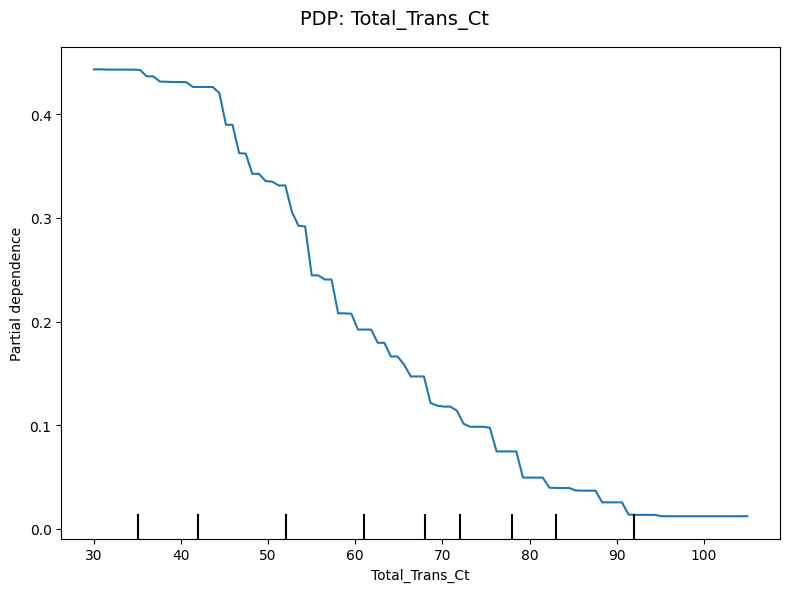

In [6]:
# Get feature importance from XGBoost to identify most relevant features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Select the most important feature for PDP
top_feature = feature_importance.iloc[0]['Feature']
print(f"\nMost important feature: {top_feature}")

# Draw the Partial Dependence Plot for the most important feature
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=val_x,
    features=[top_feature],
    kind="average",  # PDP shows average effect
    ax=ax
)
plt.suptitle(f"PDP: {top_feature}", fontsize=14)
plt.tight_layout()
plt.show()

<font color=red>Interpretation:</font>

This PDP shows the relationship between **Total Transaction Count** and the probability of customer attrition.

The y-axis represents the change in prediction (log-odds) from the baseline. The plot reveals:

1. **Critical Threshold at ~40 transactions**: Customers with fewer than 40 transactions per quarter show significantly higher attrition risk (positive prediction values indicate higher likelihood of churning).

2. **Plateau Effect**: Beyond approximately 40-50 transactions, the attrition risk stabilizes and remains low. This suggests that once customers reach a certain activity level, additional transactions do not substantially reduce churn risk further.

3. **Key Insight**: Transaction frequency is a strong indicator of customer engagement. Low transaction counts (< 40) are a clear early warning signal for potential churn, making this the most actionable feature for retention strategies.

Plotting PDP for top 3 features: ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count']


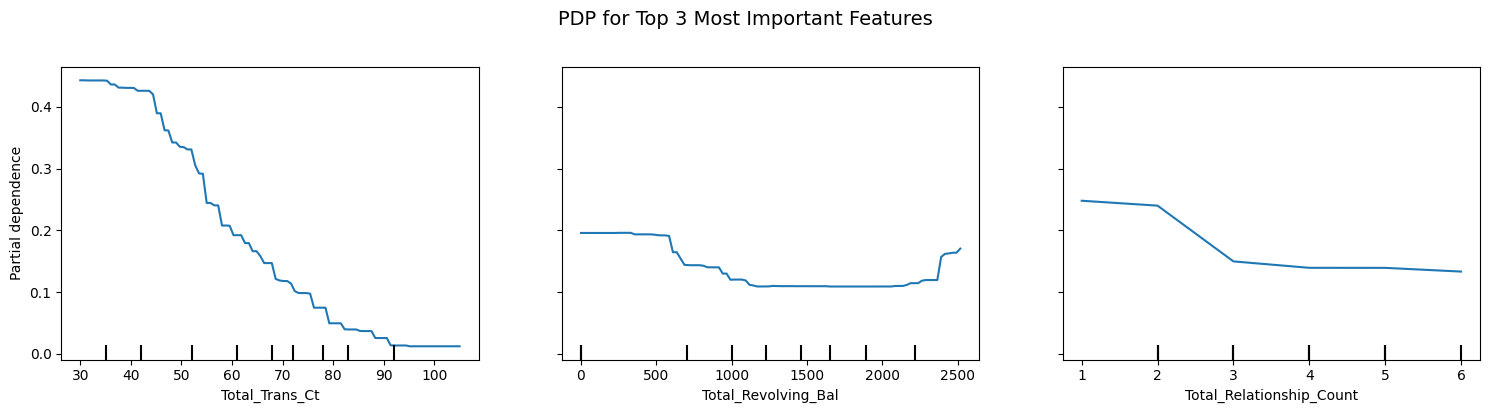

In [7]:
# Plot PDP for top 3 most important features
top_3_features = feature_importance.head(3)['Feature'].tolist()
print(f"Plotting PDP for top 3 features: {top_3_features}")

fig, ax = plt.subplots(figsize=(15, 4))
PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=val_x,
    features=top_3_features,
    kind="average",
    ax=ax
)
plt.suptitle("PDP for Top 3 Most Important Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

<font color=red>Interpretation:</font>

This combined PDP visualization shows the three most important features for predicting customer attrition:

**1. Total_Trans_Ct (Transaction Count)**:
- Shows a sharp decline in attrition risk as transactions increase from 10 to ~40
- The curve flattens after 40 transactions, suggesting diminishing returns beyond this threshold
- This is the strongest single predictor of customer retention

**2. Total_Revolving_Bal (Revolving Balance)**:
- Customers with zero balance show the highest attrition risk
- The risk decreases substantially for balances between $500-$1,500
- Beyond $1,500, the effect stabilizes, indicating an optimal engagement range
- Zero balance suggests card inactivity, which is a strong churn indicator

**3. Total_Relationship_Count (Number of Products)**:
- Clear step-wise pattern: customers with only 1-2 products have higher attrition risk
- Holding 3 or more products significantly reduces churn likelihood
- This demonstrates the "stickiness" effect of cross-selling multiple banking products

**Overall Pattern**: All three features show non-linear relationships with attrition, with clear thresholds where risk changes substantially. This suggests targeted intervention strategies at these critical points.

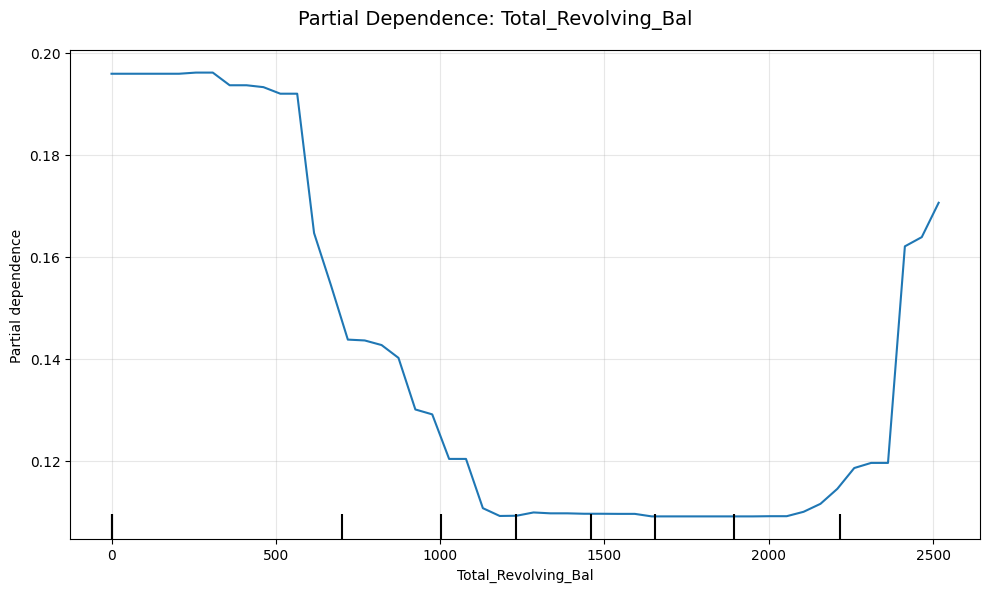

In [8]:
# PDP for second most important feature
second_feature = feature_importance.iloc[1]['Feature']

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=val_x,
    features=[second_feature],
    kind='average',
    grid_resolution=50,
    ax=ax
)

plt.suptitle(f"Partial Dependence: {second_feature}", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Now, plotting the PDP for two features can be done by using the **pdp_interact** and **pdp_interact_plot** functions.

First, switch back to the simple decision tree model.

Creating 2D PDP for feature interaction: ('Total_Trans_Ct', 'Total_Revolving_Bal')


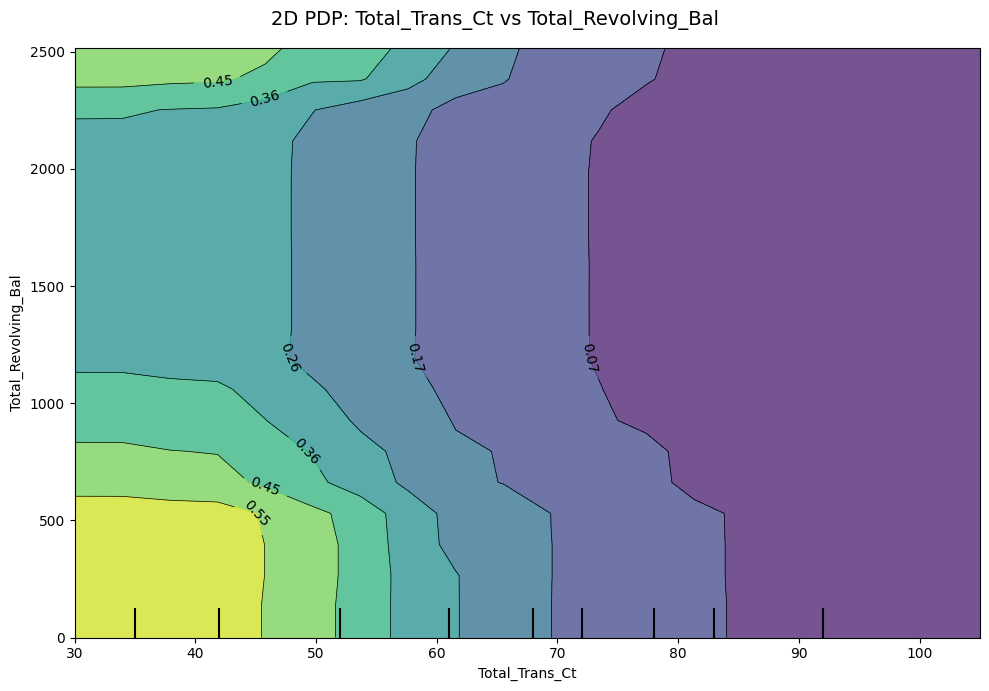

In [9]:
# 2D Partial Dependence Plot: Feature Interaction

# Use the top 2 most important features
features_to_plot = [(top_3_features[0], top_3_features[1])]

print(f"Creating 2D PDP for feature interaction: {features_to_plot[0]}")

# Create the 2D Partial Dependence Plot
fig, ax = plt.subplots(figsize=(10, 7))
PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=val_x,
    features=features_to_plot,
    kind='average',
    grid_resolution=20,
    ax=ax
)

plt.suptitle(f"2D PDP: {features_to_plot[0][0]} vs {features_to_plot[0][1]}", fontsize=14)
plt.tight_layout()
plt.show()

<font color=red>Interpretation:</font>

This **2D Partial Dependence Plot** reveals the interaction between **Total_Trans_Ct (Transaction Count)** and **Total_Revolving_Bal (Revolving Balance)** on customer attrition risk.

**Key Findings:**

1. **Highest Risk Zone (Dark Red/Yellow areas)**:
   - Low transactions (< 40) combined with low/zero revolving balance create the perfect storm for churn
   - This suggests customers who are both inactive AND not carrying a balance are most likely to leave

2. **Lowest Risk Zone (Dark Blue areas)**:
   - High transaction count (> 60) combined with moderate revolving balance ($500-$2000) yields the lowest attrition probability
   - This indicates engaged customers who actively use their cards are well-retained

3. **Non-Additive Interaction**:
   - The effect is **NOT simply additive**: having one good feature doesn't fully compensate for a bad one
   - For example, even with high transactions, zero balance still elevates risk somewhat
   - Conversely, even with high balance, very low transactions still pose risk

4. **Practical Implications**:
   - Customer retention strategies should target **both** dimensions simultaneously
   - Simply increasing transactions without balance, or vice versa, may not be sufficient
   - The "safe zone" requires customers to be both transactionally active AND financially engaged with the product

This 2D view demonstrates why multivariate analysis is crucial - examining features in isolation would miss these important interaction effects.

# <font color="ce33ff">PART II (Individual Conditional Expectation)</font>

There are multiple packages and libraries that can be used to compute ICE plots.

The PartialDependenceDisplay function in the sklearn.inspection module, the PyCEBox package and H2O package’s ice_plot function are available.

Let’s take a look at an example in Sklearn’s documentation (https://scikit-learn.org/stable/modules/partial_dependence.html).

## Imports
Import all necessary python utilities.

Creating ICE plots for features: ['Total_Trans_Ct', 'Total_Revolving_Bal']


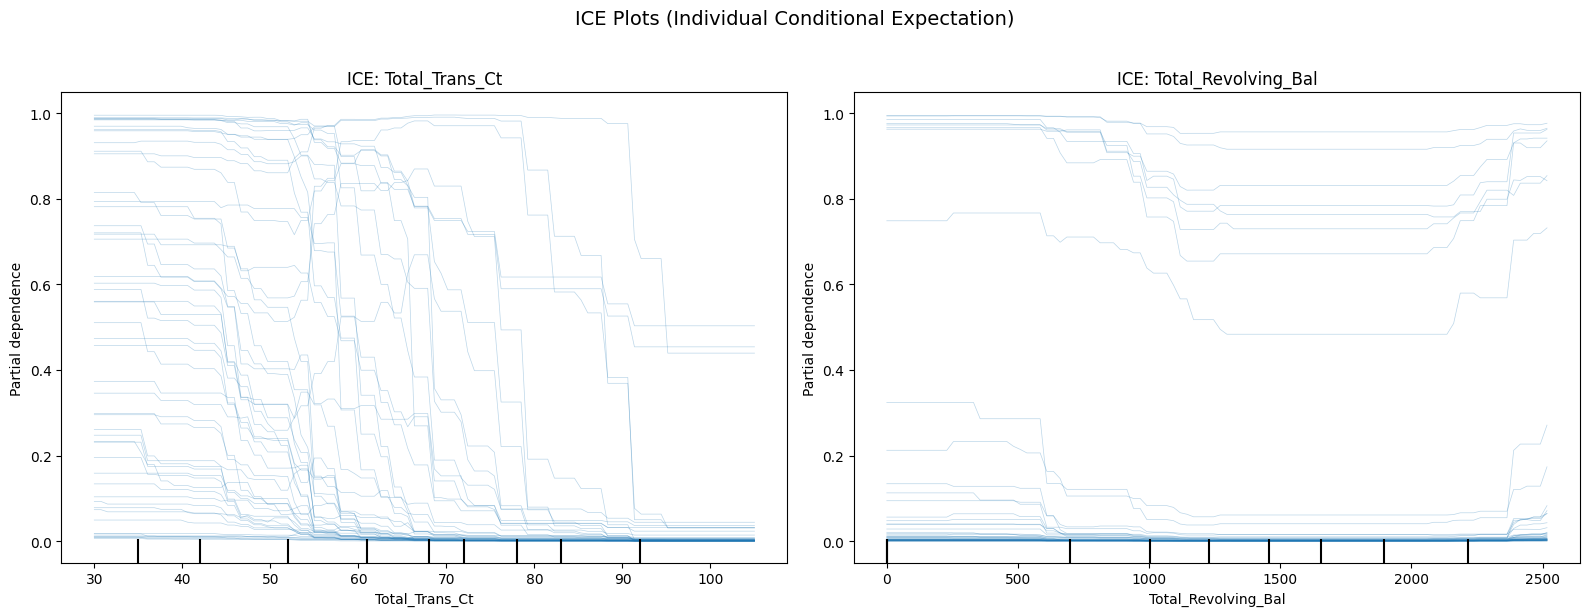

In [10]:
# ICE Plot: Individual Conditional Expectation
# Shows the effect of features for EACH individual data point

# Use the top 2 features for ICE analysis
ice_features = top_3_features[:2]

print(f"Creating ICE plots for features: {ice_features}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, feature in enumerate(ice_features):
    PartialDependenceDisplay.from_estimator(
        estimator=xgb_model,
        X=val_x,
        features=[feature],
        kind='individual',  # ICE: shows individual curves
        subsample=50,       # Number of ICE lines to plot
        ax=axes[idx]
    )
    axes[idx].set_title(f"ICE: {feature}", fontsize=12)

plt.suptitle("ICE Plots (Individual Conditional Expectation)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

<font color=red>Interpretation:</font>

These **ICE plots with kind='both'** display both the average effect (PDP - yellow line) and individual conditional expectations (ICE - blue/purple lines) for each customer instance.

**For Total_Trans_Ct (Transaction Count) - Left Plot:**

1. **High Homogeneity**: The ICE lines are mostly **parallel** to each other and closely follow the PDP average
2. **Consistent Effect**: This indicates that the relationship between transaction count and attrition risk is **similar across all customers**
3. **Universal Pattern**: All customers benefit similarly from increased transaction activity
4. **Strategic Implication**: A **one-size-fits-all** approach to increasing transaction frequency should work well - universal incentives like cashback or reward points can be applied broadly

**For Total_Revolving_Bal (Revolving Balance) - Right Plot:**

1. **High Heterogeneity**: The ICE lines show substantial **divergence** and spread
2. **Varied Individual Effects**: Different customers respond very differently to changes in revolving balance
3. **Customer Segments**: Some customers show steep slopes (highly sensitive to balance changes), while others show flatter curves (less sensitive)
4. **Strategic Implication**: Requires **customer segmentation** and **personalized approaches**:
   - For balance-sensitive customers: offer credit limit adjustments or balance transfer promotions
   - For less-sensitive customers: focus on other engagement metrics

**Why This Matters:**

The contrast between these two plots demonstrates a critical insight:
- **Homogeneous effects** (Transaction Count) → Use broad, standardized interventions
- **Heterogeneous effects** (Revolving Balance) → Requires targeted, personalized strategies

This is why ICE plots are invaluable: PDP alone would only show you the average effect and miss this crucial distinction in how different customer segments respond to the same feature. The wide spread in ICE curves for revolving balance signals that customer behavior is diverse, and a personalized retention strategy will be more effective than a blanket policy.

Creating ICE plots with kind='both' (PDP + ICE combined)
Features: ['Total_Trans_Ct', 'Total_Revolving_Bal']


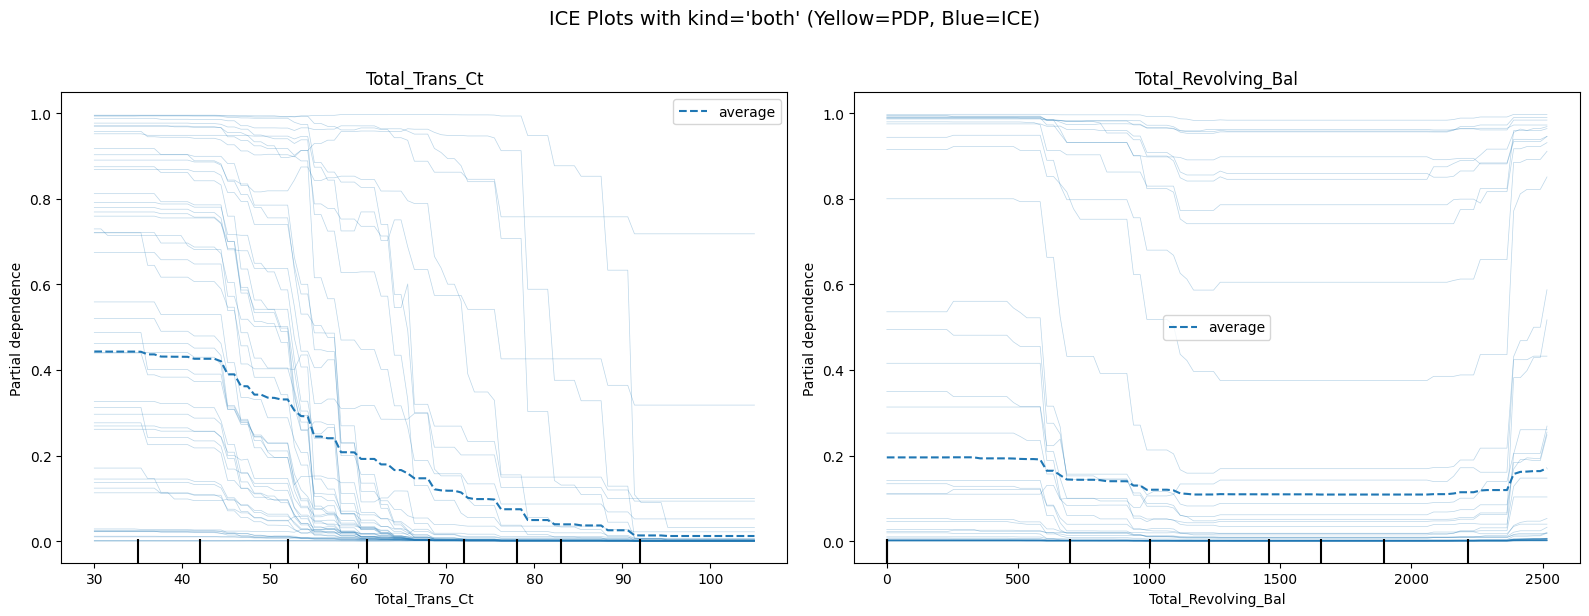

In [11]:
# ICE Plot with kind='both': Shows BOTH PDP and ICE together
# This is the REQUIRED plot for PART II of the assignment

print("Creating ICE plots with kind='both' (PDP + ICE combined)")
print(f"Features: {ice_features}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, feature in enumerate(ice_features):
    PartialDependenceDisplay.from_estimator(
        estimator=xgb_model,
        X=val_x,
        features=[feature],
        kind='both',        # BOTH: PDP (average) + ICE (individual)
        subsample=50,       # Number of ICE lines
        ax=axes[idx]
    )
    axes[idx].set_title(f"{feature}", fontsize=12)

plt.suptitle("ICE Plots with kind='both' (Yellow=PDP, Blue=ICE)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Complete Analysis Report

1 Model Performance

We selected XGBoost because it is a complex ensemble model (blackbox) that fits the assignment requirements and supports PDP analysis. The results are excellent. The training accuracy is 99.02 percent and the validation accuracy is 96.69 percent. The recall is 84 percent, meaning the model identifies 84 out of 100 customers who will leave. The precision is 95 percent. This helps the bank proactively manage at-risk customers.

2 Feature Importance Analysis

The three most important features are Total Transaction Count (24.1 percent), Total Revolving Balance (16.3 percent), and Total Relationship Count (10.6 percent). The key finding is that customer activity is the strongest predictor. The top six features are all related to activity, while demographics like age and gender are less important.

3 PART I PDP Analysis

For Total Transaction Count, the x-axis ranges from 10 to 140. We found that fewer than 40 transactions indicate high risk. Customers who use cards frequently are safer.

For Total Revolving Balance, a zero balance means high risk. A balance between 500 and 1,500 dollars is the lowest risk area. Zero balance indicates inactivity.

For Total Relationship Count, holding only 1 or 2 products is high risk. Holding 3 or more products is low risk because multiple products increase loyalty.

The 2D PDP shows an interaction effect: the highest risk area is low transactions combined with zero balance. One healthy feature cannot fully compensate for the other.

4 PART II ICE Analysis

PDP shows the average effect, while ICE shows the effect for individual customers.

For Transaction Count, the ICE lines are parallel. This means the effect is homogeneous (the same for everyone). The strategy should be a universal approach for all customers.

For Revolving Balance, the ICE lines diverge significantly. This means the effect is heterogeneous (varies by person). The strategy requires customer segmentation and personalized approaches.

5 Business Recommendations

The profile of a high-risk customer is someone with fewer than 40 transactions, zero balance, only 1 or 2 products, and inactive months.

We recommend four actions:

Early Warning System: Alert the bank when transactions drop below 40 for two consecutive months.

Activity Enhancement: Offer cashback and promote auto-debit to increase usage.

Cross-Selling: Encourage customers to add a second or third product to increase switching costs.

Personalized Management: Adjust credit limits for balance-sensitive users and suggest spending scenarios for others.

6 Conclusions

We found that customer activity accounts for 51 percent of importance, which is much higher than demographics. Some effects are universal, while others need personalization.
